In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "fitbit-tracker-data"

**Google Data Analytics Capstone Project: Case Study **

Analyzing consumer insights using FitBit Fitness tracker data for Bellabeat Market Analytics.

Bellabeat manufactures tech-driven wellness products for women and have made its reputation to empower women using the products they manufacture in wellness industry. As the company is evolving and has set up multiple offices globally, they need to expand their product to worldwide audience based on the current trends offered by other wellness tech gadgets.

ASK PHASE:

For the market analytics of Bellabeat product it is essential to answers the following questions:

* Which consumer trends are most utilized in smart devices.
* Which features is widely used in smart devices.
* Consumer acceptance for smart devices.
* How could overall trend help in strategizing Bellabeat product campaign.

Stakeholders:
Bellabeat’s Cofounders Urska Srsen and Sando Mur, the marketing analytics team, the executive team, the product development team, and Bellabeat’s comsumers.

PREPARE PHASE:

Data set used: The data set used is from FitBit fitness tracker data which is available at mobius, this data will be stored at kaggle for our analysis. This data contains data about 33 users organised by their "id". Inspection about the data reveals that the sample size is small and the data is directly collected from the users which can make it bias free but to conclude the ROCCC criteria, it is not sufficient to make arugument on it.

Below are the steps to be followed to make the data ready for further analysis.

In [3]:
#importing the required libraries for analysis
library(tidyverse)
library(skimr)
library(janitor)
library(lubridate)
library(readr)
library(dplyr)
library(readr)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [4]:
#import the required data sets for exploration
daily_activity <- read.csv("../input/fitbit-tracker-data/dailyActivity_merged.csv")
daily_calories <- read.csv("../input/fitbit-tracker-data/dailyCalories_merged.csv")
daily_intensity <- read.csv("../input/fitbit-tracker-data/dailyIntensities_merged.csv")
daily_steps <- read.csv("../input/fitbit-tracker-data/dailySteps_merged.csv")
heart_rate <- read.csv("../input/fitbit-tracker-data/heartrate_seconds_merged.csv")
weight_log <- read.csv("../input/fitbit-tracker-data/weightLogInfo_merged.csv")
sleep_day <- read.csv("../input/fitbit-tracker-data/sleepDay_merged.csv")

PROCESS PHASE:

In this phase we will look for the consistency of the data and mutate data in accordance with the need of the process required. 

In [5]:
str(daily_activity)
str(daily_calories)
str(daily_intensity)
str(daily_steps)
str(weight_log)
str(sleep_day)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [6]:
#to create a new column for the total activity as sum of all activities and formatting the new column
library(dplyr)
daily_activity <- mutate(daily_activity, totalactivitymins = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)
str(daily_activity)
daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate, format = "%m/%d/%Y" )
summary <-daily_activity %>%
  group_by(Id) %>%
  summarise (lightactive=sum(LightlyActiveMinutes),
             mediumactive=sum(FairlyActiveMinutes),
             heavyactive=sum(VeryActiveMinutes),
             total= lightactive +mediumactive+heavyactive,
             lightactivepercent= lightactive/total,
             mediumactivepercent= mediumactive/total,
             heavyactivepercent= heavyactive/total)
View(summary)

'data.frame':	940 obs. of  16 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

Id,lightactive,mediumactive,heavyactive,total,lightactivepercent,mediumactivepercent,heavyactivepercent
<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1503960366,6818,594,1200,8612,0.7916860,0.068973525,0.1393404552
1624580081,4758,180,269,5207,0.9137699,0.034568850,0.0516612253
1644430081,5354,641,287,6282,0.8522763,0.102037568,0.0456860872
1844505072,3579,40,4,3623,0.9878554,0.011040574,0.0011040574
1927972279,1196,24,41,1261,0.9484536,0.019032514,0.0325138779
2022484408,7981,600,1125,9706,0.8222749,0.061817433,0.1159076860
2026352035,7956,8,3,7967,0.9986193,0.001004142,0.0003765533
2320127002,6144,80,42,6266,0.9805298,0.012767316,0.0067028407
2347167796,4545,370,243,5158,0.8811555,0.071733230,0.0471112834


Warning message:
“Expected 2 pieces. Additional pieces discarded in 67 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


Id,NewDate,Time,WeightKg,BMI,IsManualReport,LogId,BMICategory
<dbl>,<date>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1503960366,2016-05-02,11:59:59,52.6,22.65,True,1.462234e+12,Healthy Weight
1503960366,2016-05-03,11:59:59,52.6,22.65,True,1.462320e+12,Healthy Weight
1927972279,2016-04-13,1:08:52,133.5,47.54,False,1.460510e+12,Obese
2873212765,2016-04-21,11:59:59,56.7,21.45,True,1.461283e+12,Healthy Weight
2873212765,2016-05-12,11:59:59,57.3,21.69,True,1.463098e+12,Healthy Weight
4319703577,2016-04-17,11:59:59,72.4,27.45,True,1.460938e+12,Overweight
4319703577,2016-05-04,11:59:59,72.3,27.38,True,1.462406e+12,Overweight
4558609924,2016-04-18,11:59:59,69.7,27.25,True,1.461024e+12,Overweight
4558609924,2016-04-25,11:59:59,70.3,27.46,True,1.461629e+12,Overweight


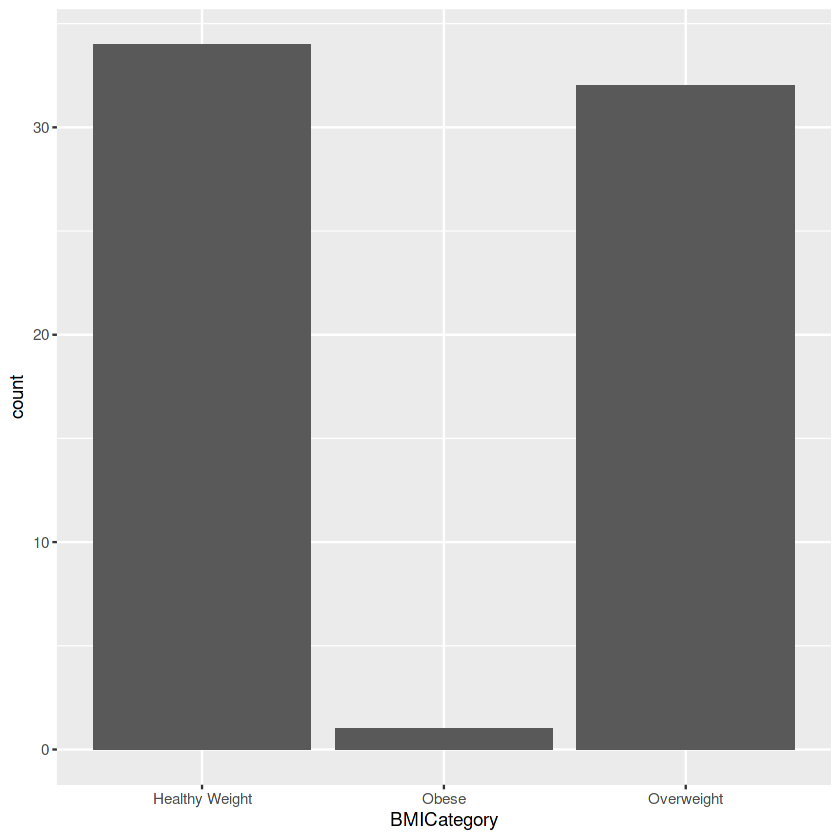

In [7]:
#BMI classification trend can be based upon various categories

weight_log <- weight_log %>% 
  separate(Date, c("NewDate", "Time"), sep = " ")

weight_log$NewDate <- as.Date(weight_log$NewDate, format = "%m/%d/%Y")

weight_log <-
  mutate(weight_log, BMICategory = case_when(weight_log$BMI < 18.5 ~ "Underweight",
                                             weight_log$BMI >= 18.5 & weight_log$BMI < 25 ~ "Healthy Weight",
                                             weight_log$BMI >= 25 & weight_log$BMI < 30 ~ "Overweight",
                                             weight_log$BMI >= 30 ~ "Obese"))
new_weight <-
  weight_log %>% 
  select(-Fat,-WeightPounds) %>%
  group_by(Id)
View(new_weight)
ggplot(data=new_weight)+geom_bar(mapping=aes(x=BMICategory))

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleepcategory
<dbl>,<date>,<int>,<int>,<int>,<chr>
1503960366,2016-04-12,1,327,346,5-7hrs
1503960366,2016-04-13,2,384,407,5-7hrs
1503960366,2016-04-15,1,412,442,5-7hrs
1503960366,2016-04-16,2,340,367,5-7hrs
1503960366,2016-04-17,1,700,712,>7hrs
1503960366,2016-04-19,1,304,320,5-7hrs
1503960366,2016-04-20,1,360,377,5-7hrs
1503960366,2016-04-21,1,325,364,5-7hrs
1503960366,2016-04-23,1,361,384,5-7hrs


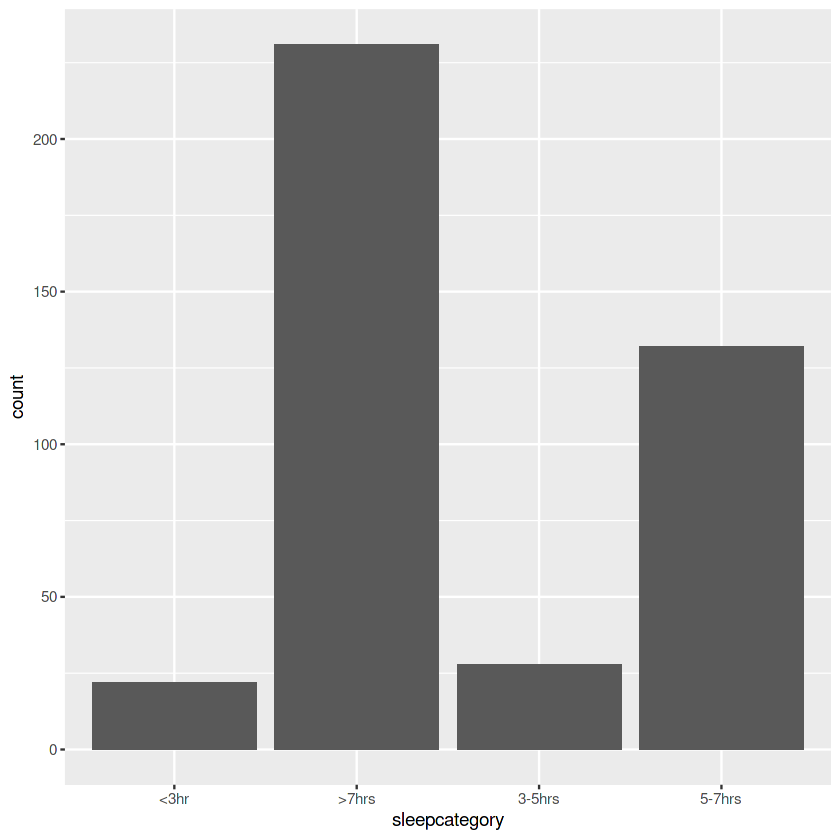

In [8]:
#Cleaning the sleep_day data and categorizing the data in categories
sleep_day <- sleep_day %>% 
  separate(SleepDay, c("Date","Time"),sep = " ")

sleep_day$Date <- as.Date(sleep_day$Date,format = "%m/%d/%Y")
sleep_day <- select(sleep_day,-Time)
sleep_day <- 
  mutate(sleep_day, sleepcategory = case_when(sleep_day$TotalMinutesAsleep < 180 ~ "<3hr",
                                               sleep_day$TotalMinutesAsleep >= 180 & sleep_day$TotalMinutesAsleep < 300 ~ "3-5hrs",
                                               sleep_day$TotalMinutesAsleep >= 300 & sleep_day$TotalMinutesAsleep < 420 ~ "5-7hrs",
                                               sleep_day$TotalMinutesAsleep >= 420 ~ ">7hrs"))
View(sleep_day)
ggplot(data=sleep_day)+geom_bar(mapping=aes(x=sleepcategory))

In [14]:
# To merge daily_activity and sleep_day together to activity_sleep
activity_sleep <-
  left_join(daily_activity,sleep_day, by = c("Id" = "Id", "ActivityDate" = "Date"))

# To merge the 3 data frames together
data_merged <-
  left_join(activity_sleep,new_weight, by= c("Id"="Id", "ActivityDate"="NewDate"))

In [15]:
# summary of activity related data
data_merged %>% 
  select(TotalSteps,
         TotalDistance,
         VeryActiveMinutes,
         FairlyActiveMinutes,
         LightlyActiveMinutes,
         totalactivitymins,
         SedentaryMinutes,
         Calories) %>% 
  summary()
View(all_data)

   TotalSteps    TotalDistance    VeryActiveMinutes FairlyActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 3795   1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 7439   Median : 5.260   Median :  4.00    Median :  7.00     
 Mean   : 7652   Mean   : 5.503   Mean   : 21.24    Mean   : 13.63     
 3rd Qu.:10734   3rd Qu.: 7.720   3rd Qu.: 32.00    3rd Qu.: 19.00     
 Max.   :36019   Max.   :28.030   Max.   :210.00    Max.   :143.00     
 LightlyActiveMinutes totalactivitymins SedentaryMinutes    Calories   
 Min.   :  0          Min.   :  0.0     Min.   :   0.0   Min.   :   0  
 1st Qu.:127          1st Qu.:147.0     1st Qu.: 729.0   1st Qu.:1830  
 Median :199          Median :248.0     Median :1057.0   Median :2140  
 Mean   :193          Mean   :227.9     Mean   : 990.4   Mean   :2308  
 3rd Qu.:264          3rd Qu.:317.5     3rd Qu.:1229.0   3rd Qu.:2796  
 Max.   :518          Max.   :552.0     Max.   :1440.0   Max.   

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleepcategory,Time,WeightKg,BMI,IsManualReport,LogId,BMICategory
<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,1,327,346,5-7hrs,NA,NA,NA,NA,NA,NA
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,2,384,407,5-7hrs,NA,NA,NA,NA,NA,NA
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,1,412,442,5-7hrs,NA,NA,NA,NA,NA,NA
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,2,340,367,5-7hrs,NA,NA,NA,NA,NA,NA
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,1,700,712,>7hrs,NA,NA,NA,NA,NA,NA
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,1,304,320,5-7hrs,NA,NA,NA,NA,NA,NA
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,⋯,1,360,377,5-7hrs,NA,NA,NA,NA,NA,NA


ANALYSIS PHASE:

In this phase we will address the analysis of our finding and later share it with the stakeholders. We will identify insights relevant to our ASK PHASE and create viz to demonstrate the findings.

In [16]:
# summary of activity related data
data_merged %>% 
  select(TotalSteps,
         TotalDistance,
         VeryActiveMinutes,
         FairlyActiveMinutes,
         LightlyActiveMinutes,
         totalactivitymins,
         SedentaryMinutes,
         Calories) %>% 
  summary()

   TotalSteps    TotalDistance    VeryActiveMinutes FairlyActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 3795   1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 7439   Median : 5.260   Median :  4.00    Median :  7.00     
 Mean   : 7652   Mean   : 5.503   Mean   : 21.24    Mean   : 13.63     
 3rd Qu.:10734   3rd Qu.: 7.720   3rd Qu.: 32.00    3rd Qu.: 19.00     
 Max.   :36019   Max.   :28.030   Max.   :210.00    Max.   :143.00     
 LightlyActiveMinutes totalactivitymins SedentaryMinutes    Calories   
 Min.   :  0          Min.   :  0.0     Min.   :   0.0   Min.   :   0  
 1st Qu.:127          1st Qu.:147.0     1st Qu.: 729.0   1st Qu.:1830  
 Median :199          Median :248.0     Median :1057.0   Median :2140  
 Mean   :193          Mean   :227.9     Mean   : 990.4   Mean   :2308  
 3rd Qu.:264          3rd Qu.:317.5     3rd Qu.:1229.0   3rd Qu.:2796  
 Max.   :518          Max.   :552.0     Max.   :1440.0   Max.   

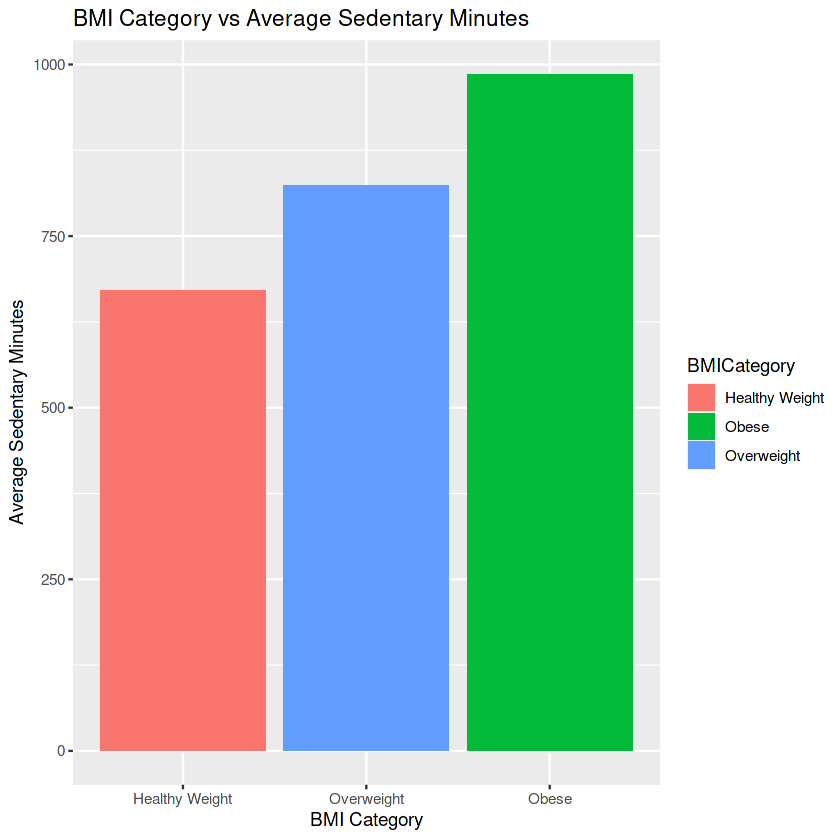

In [17]:
#BMI Category vs avg sedentary mins
data_merged %>% 
  drop_na() %>% 
  group_by(BMICategory) %>% 
  summarise(avg_smin = mean(SedentaryMinutes)) %>% 
  ggplot(aes(x=BMICategory,y=avg_smin, fill = BMICategory))+
  geom_bar(stat = "identity")+
  scale_x_discrete(limits = c("Healthy Weight", "Overweight","Obese"))+
  labs(title = "BMI Category vs Average Sedentary Minutes",
       x="BMI Category",
       y = "Average Sedentary Minutes")

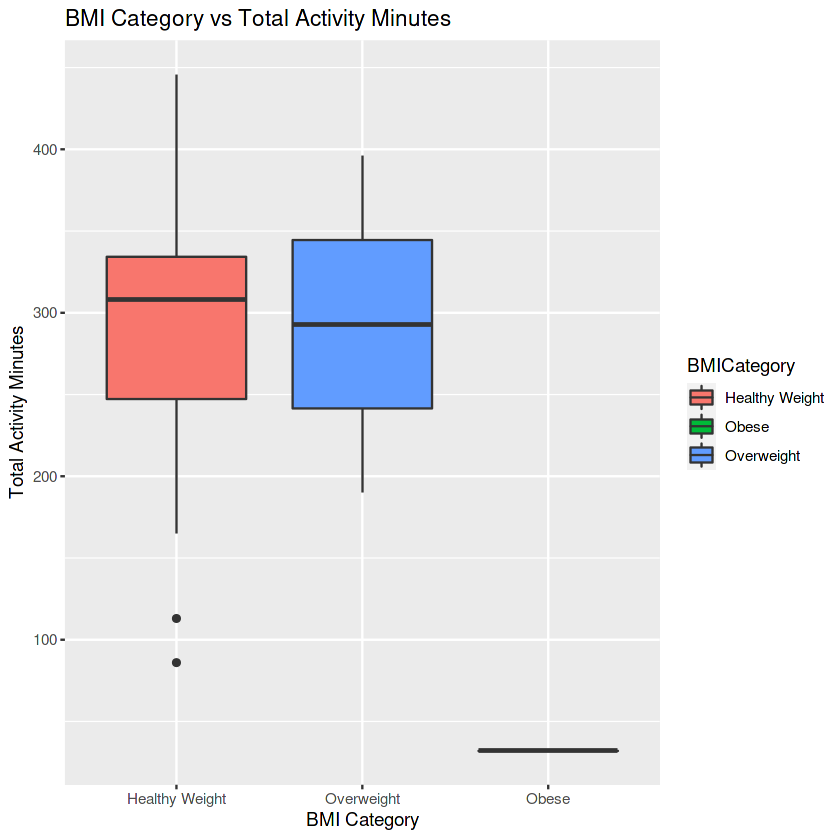

In [18]:
# BMI category vs  total active mins
data_merged %>% 
  drop_na() %>% 
  group_by(BMICategory) %>% 
  ggplot(aes(x=BMICategory,y=totalactivitymins, fill = BMICategory))+
  geom_boxplot()+
  scale_x_discrete(limits = c("Healthy Weight", "Overweight","Obese"))+
  labs(title = "BMI Category vs Total Activity Minutes",
       x="BMI Category",
       y = "Total Activity Minutes")

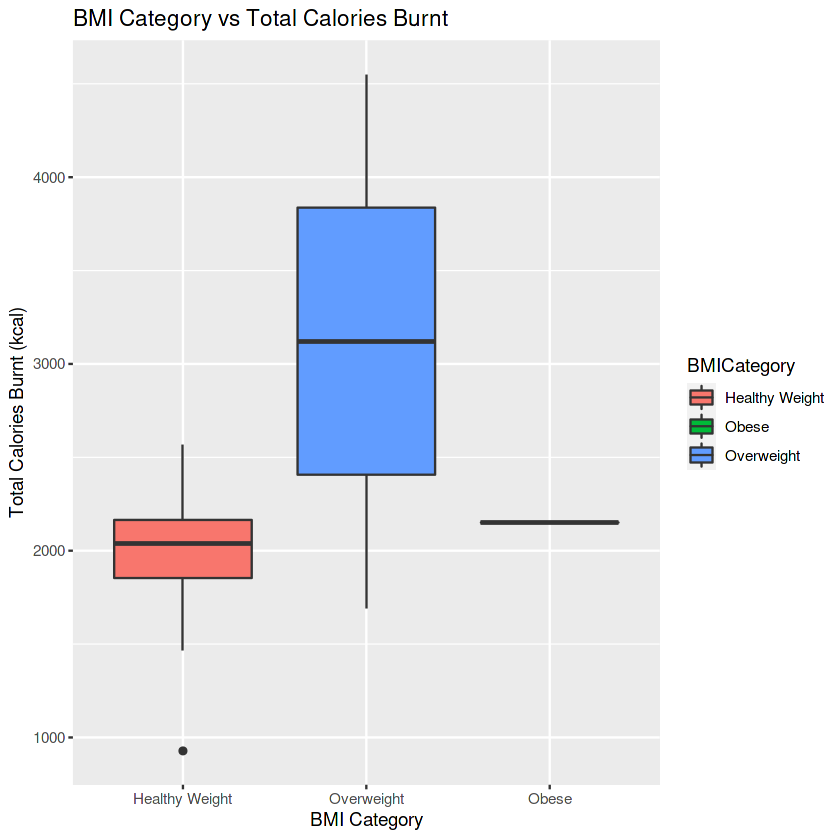

In [20]:
# BMI Category vs total calories burnt
data_merged %>% 
  drop_na() %>% 
  group_by(BMICategory) %>% 
  ggplot(aes(x=BMICategory,y=Calories, fill = BMICategory))+
  geom_boxplot()+
  scale_x_discrete(limits = c("Healthy Weight", "Overweight","Obese"))+
  labs(title = "BMI Category vs Total Calories Burnt",
       x="BMI Category",
       y = "Total Calories Burnt (kcal)")

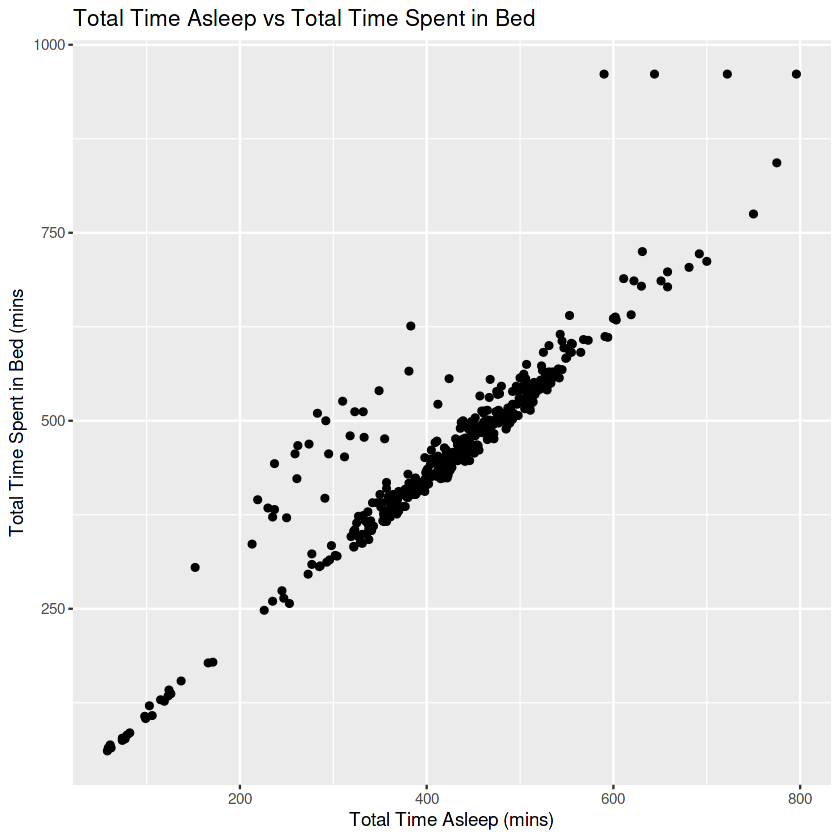

In [21]:
#Total Sleeping Time vs Total Time in Bed
sleep_day %>% 
  ggplot(aes(x=TotalMinutesAsleep,y=TotalTimeInBed))+
  geom_point()+
  labs(title="Total Time Asleep vs Total Time Spent in Bed",
       x="Total Time Asleep (mins)",
       y="Total Time Spent in Bed (mins")

In [22]:
cor.test(all_data$totalactivitymins,all_data$SedentaryMinutes)
cor.test(all_data$TotalSteps,all_data$totalactivitymins)
cor.test(all_data$TotalSteps,all_data$Calories)
cor.test(all_data$TotalMinutesAsleep,all_data$TotalTimeInBed)


	Pearson's product-moment correlation

data:  all_data$totalactivitymins and all_data$SedentaryMinutes
t = -16.644, df = 941, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5247584 -0.4260249
sample estimates:
       cor 
-0.4768946 



	Pearson's product-moment correlation

data:  all_data$TotalSteps and all_data$totalactivitymins
t = 37.352, df = 941, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7457446 0.7972984
sample estimates:
      cor 
0.7727932 



	Pearson's product-moment correlation

data:  all_data$TotalSteps and all_data$Calories
t = 22.588, df = 941, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5499261 0.6328341
sample estimates:
      cor 
0.5929493 



	Pearson's product-moment correlation

data:  all_data$TotalMinutesAsleep and all_data$TotalTimeInBed
t = 51.483, df = 411, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9162253 0.9423445
sample estimates:
      cor 
0.9304575 
